In [3]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [4]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [5]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [6]:
config = {}

config['camera'] = "03"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

## experiment 1
config['date1'] = "2024-05-02"
config['date2'] = "2024-05-22"

# experiment 2 (after readjustment)
config['date1'] = "2024-05-23"
config['date2'] = "2024-06-12"


In [7]:
mlti = __load_mlti(config['date1'], config['date2'], "Z", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [8]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [28]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-05-23
2024-05-24
2024-05-25
2024-05-26
2024-05-27
2024-05-28
2024-05-29
2024-05-30
2024-05-31
2024-06-01
2024-06-02
2024-06-03
2024-06-04
2024-06-05
2024-06-06
2024-06-07
2024-06-08
2024-06-09
2024-06-10
2024-06-11
2024-06-12


In [29]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-05-23T00:14:04.000000Z,560.333391,414.091148,560.0,414.0,2.947638e+02,159.936719,154.963103,-0.443789,7.476037e+00,0.000460,0.000443,0.001584,0.000526,0.000564,0.000009,0.000086,0.0
1,2024-05-23T00:16:03.000000Z,500.000000,350.000000,500.0,350.0,1.232679e-18,500.000000,500.000000,0.000000,1.711560e-17,inf,inf,inf,inf,inf,inf,inf,119.0
2,2024-05-23T00:23:04.000000Z,560.340610,414.094143,560.0,414.0,2.951580e+02,159.902111,154.936984,-0.443277,7.063808e+00,0.000458,0.000441,0.001582,0.000524,0.000561,0.000009,0.000086,540.0
3,2024-05-23T00:24:04.000000Z,560.338226,414.100141,560.0,414.0,2.951815e+02,159.917946,154.948224,-0.444022,7.062526e+00,0.000459,0.000441,0.001583,0.000524,0.000561,0.000009,0.000086,600.0
4,2024-05-23T00:38:03.000000Z,560.347357,414.099131,560.0,414.0,2.953586e+02,159.971611,154.990997,-0.443019,6.997705e+00,0.000460,0.000443,0.001590,0.000526,0.000564,0.000009,0.000087,1439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,2024-06-12T23:39:06.000000Z,569.276991,420.944837,569.0,421.0,2.303866e+02,150.019325,144.806633,-0.356556,3.561743e+00,0.000280,0.000265,0.000665,0.000307,0.000331,0.000005,0.000029,1812302.0
3018,2024-06-12T23:41:06.000000Z,569.298629,421.037991,569.0,421.0,2.092711e+02,-149.678420,-144.497572,-0.361881,3.317418e+00,0.000288,0.000273,0.000568,0.000316,0.000340,0.000005,0.000025,1812422.0
3019,2024-06-12T23:43:07.000000Z,569.283552,420.996303,569.0,421.0,2.213616e+02,149.869185,144.655697,-0.358624,3.290017e+00,0.000284,0.000269,0.000625,0.000311,0.000335,0.000005,0.000027,1812543.0
3020,2024-06-12T23:52:07.000000Z,569.287387,420.983204,569.0,421.0,2.200587e+02,149.845676,144.642439,-0.358782,3.405942e+00,0.000284,0.000269,0.000618,0.000312,0.000336,0.000005,0.000027,1813083.0


### Remove MLTI times

In [30]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [31]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-05-23T00:14:04.000000Z,2.969767,2.194683,2.9680,2.1942,2.947638e+02,159.936719,154.963103,-0.443789,7.476037e+00,...,0.000443,0.001584,0.000526,0.000564,0.000009,0.000086,0.0,2024-05-22T23:14:04.000000Z,2.1942,2.9680
1,2024-05-23T00:16:03.000000Z,2.650000,1.855000,2.6500,1.8550,1.232679e-18,500.000000,500.000000,0.000000,1.711560e-17,...,inf,inf,inf,inf,inf,inf,119.0,2024-05-22T23:16:03.000000Z,1.8550,2.6500
2,2024-05-23T00:23:04.000000Z,2.969805,2.194699,2.9680,2.1942,2.951580e+02,159.902111,154.936984,-0.443277,7.063808e+00,...,0.000441,0.001582,0.000524,0.000561,0.000009,0.000086,540.0,2024-05-22T23:23:04.000000Z,2.1942,2.9680
3,2024-05-23T00:24:04.000000Z,2.969793,2.194731,2.9680,2.1942,2.951815e+02,159.917946,154.948224,-0.444022,7.062526e+00,...,0.000441,0.001583,0.000524,0.000561,0.000009,0.000086,600.0,2024-05-22T23:24:04.000000Z,2.1942,2.9680
4,2024-05-23T00:38:03.000000Z,2.969841,2.194725,2.9680,2.1942,2.953586e+02,159.971611,154.990997,-0.443019,6.997705e+00,...,0.000443,0.001590,0.000526,0.000564,0.000009,0.000087,1439.0,2024-05-22T23:38:03.000000Z,2.1942,2.9680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,2024-06-12T23:39:06.000000Z,3.017168,2.231008,3.0157,2.2313,2.303866e+02,150.019325,144.806633,-0.356556,3.561743e+00,...,0.000265,0.000665,0.000307,0.000331,0.000005,0.000029,1812302.0,2024-06-12T22:39:06.000000Z,2.2313,3.0157
3018,2024-06-12T23:41:06.000000Z,3.017283,2.231501,3.0157,2.2313,2.092711e+02,-149.678420,-144.497572,-0.361881,3.317418e+00,...,0.000273,0.000568,0.000316,0.000340,0.000005,0.000025,1812422.0,2024-06-12T22:41:06.000000Z,2.2313,3.0157
3019,2024-06-12T23:43:07.000000Z,3.017203,2.231280,3.0157,2.2313,2.213616e+02,149.869185,144.655697,-0.358624,3.290017e+00,...,0.000269,0.000625,0.000311,0.000335,0.000005,0.000027,1812543.0,2024-06-12T22:43:07.000000Z,2.2313,3.0157
3020,2024-06-12T23:52:07.000000Z,3.017223,2.231211,3.0157,2.2313,2.200587e+02,149.845676,144.642439,-0.358782,3.405942e+00,...,0.000269,0.000618,0.000312,0.000336,0.000005,0.000027,1813083.0,2024-06-12T22:52:07.000000Z,2.2313,3.0157


### Remove artefacts

In [32]:
# remove corrupt values
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 20]

# when intensity is super high or saturated, there is likely a MLTI boost
df = df[df['amp'] < 255]

### Plotting

In [33]:
from functions.reduce import __reduce

In [34]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

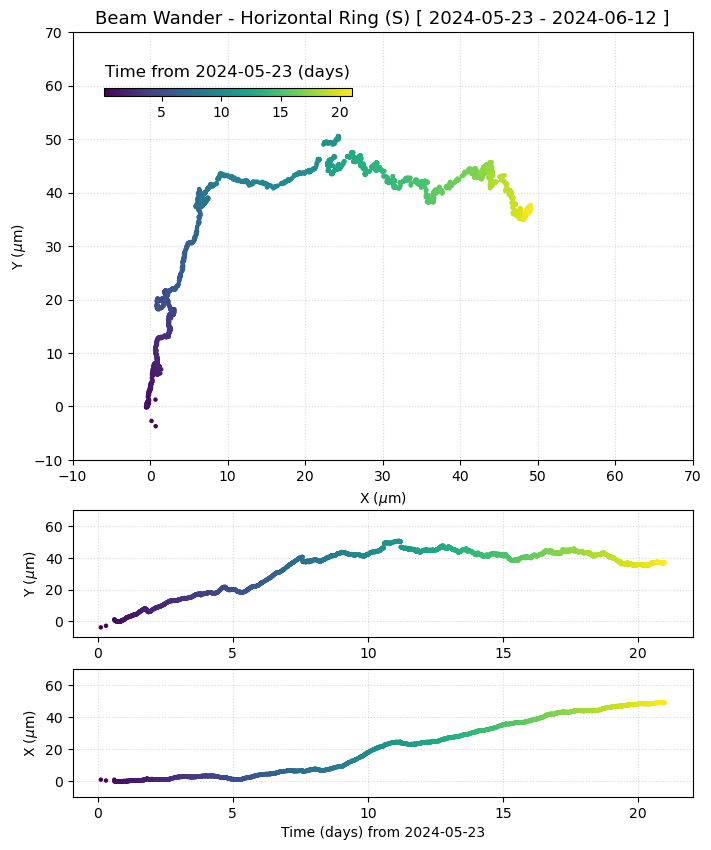

In [38]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -10, 70
    y1, y2 = -10, 70
    ax1.set_xlim(x1, x2)
    ax1.set_ylim(y1, y2)
    ax2.set_ylim(y1, y2)
    ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - Horizontal Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


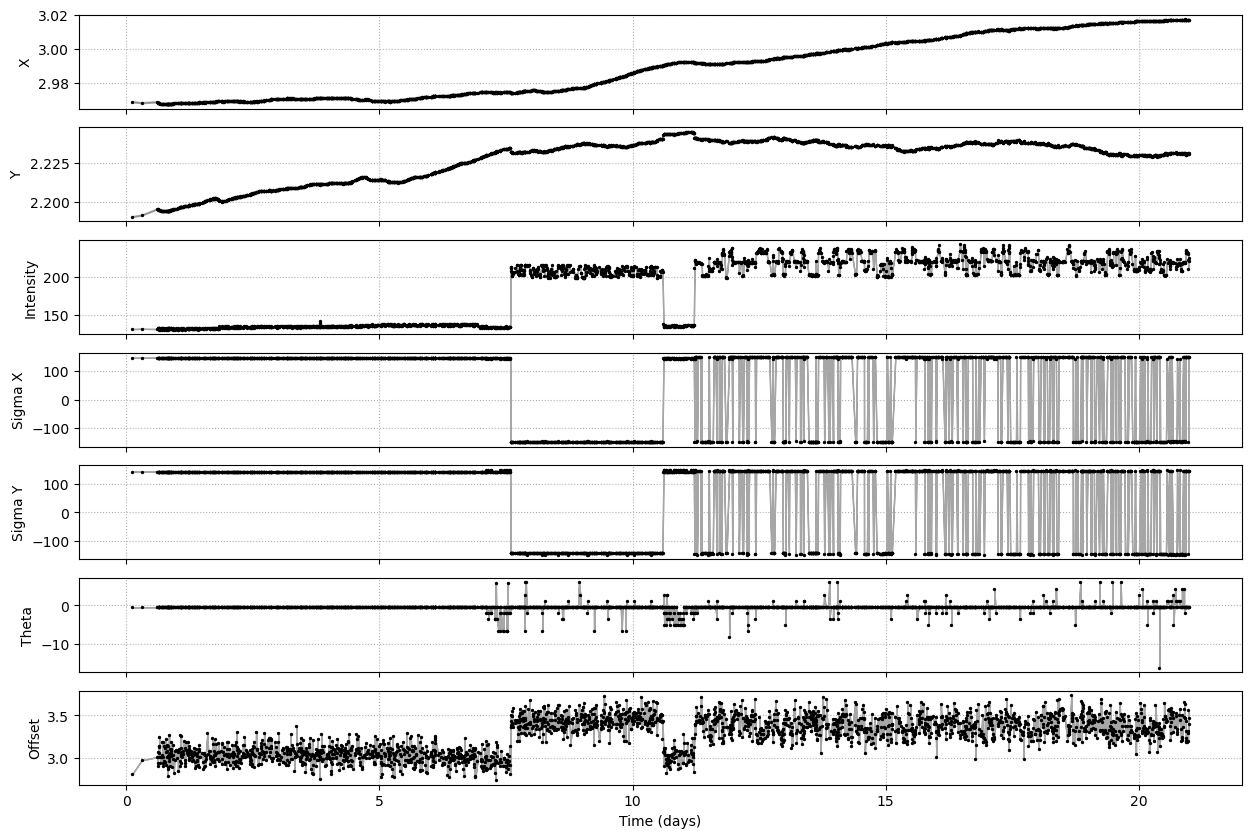

In [45]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')
